In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_excel(r'C:\Users\Dess\Desktop\Power BI\Assignm1.xlsx')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Номер    143 non-null    int64 
 1   ФИО      143 non-null    object
 2   Отрасль  143 non-null    object
 3   Тест     143 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


In [163]:
df.head()

,Номер,ФИО,Отрасль,Тест
0,1,Соболева Ирина,ИТ,Моё слово
1,2,Исакова Дария,ИТ,Моё слово
2,3,Иванова Эвелина,Финансы,Моё слово
3,4,Потапов Ян,Наука,Моё слово
4,5,Шашкова Ирма,Металлургия,Моё слово


In [164]:
df.value_counts()

Номер  ФИО                 Отрасль               Тест     
1      Соболева Ирина      ИТ                    Моё слово    1
99     Евдокимова Марьяна  Общественное питание  Моё слово    1
93     Михеева Ада         Общественное питание  Моё слово    1
94     Егоров Мирослав     Металлургия           Моё слово    1
95     Виноградова Силика  Финансы               Моё слово    1
                                                             ..
49     Родионов Станислав  Здравоохранение       Моё слово    1
50     Авдеев Вольдемар    Здравоохранение       Моё слово    1
51     Лыткин Любовь       Здравоохранение       Моё слово    1
52     Крюкова Алевтина    ИТ                    Моё слово    1
143    Седов Станислав     Наука                 Моё слово    1
Length: 143, dtype: int64

In [165]:
d = df.groupby('Отрасль').count().reset_index()
d = d.iloc[:, [0,1]].sort_values(by='Номер',ascending=[False]) # select two colums

Text(0.5, 1.0, 'Распределение зарплат по отраслям')

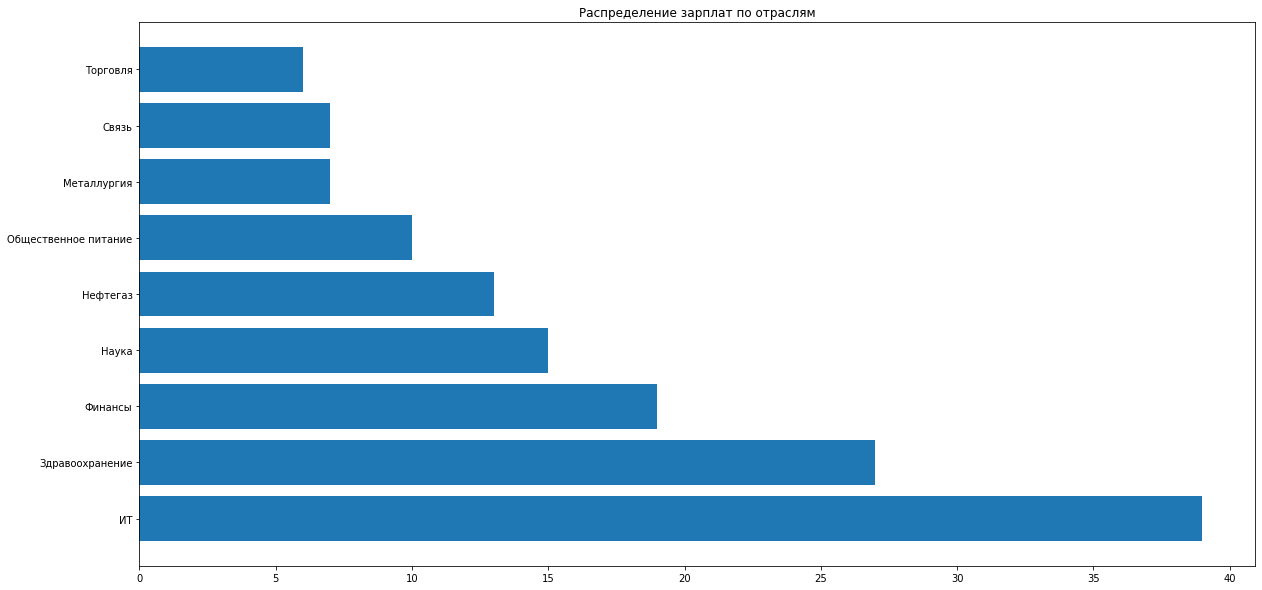

In [166]:
h = plt.figure(figsize=(20,10))
plt.barh(d['Отрасль'], d['Номер'])
plt.title('Распределение зарплат по отраслям')


In [167]:
incomes = pd.read_excel(r'C:\Users\Dess\Desktop\Power BI\Assignm2.xlsx')

In [168]:
incomes = incomes.rename({'Name': 'ФИО'}, axis=1)
incomes

,ФИО,"Annual Income, mln RUR"
0,Шашков Вальтер,6
1,Самсонов Прохор,11
2,Некрасова Татьяна,6
3,Копылова Эллина,6
4,Зуев Осип,6
...,...,...
138,Никифоров Ермак,9
139,Савин Натан,19
140,Архипов Станислав,23
141,Струна Марина,20


In [169]:
table = pd.merge(incomes, df, how= 'inner', left_on=['ФИО'], right_on=['ФИО'])

In [170]:
table = table[['ФИО', 'Annual Income, mln RUR', 'Отрасль']]
table = table.groupby('Отрасль').mean().reset_index()

Text(0.5, 1.0, 'Количество денег на отрасль')

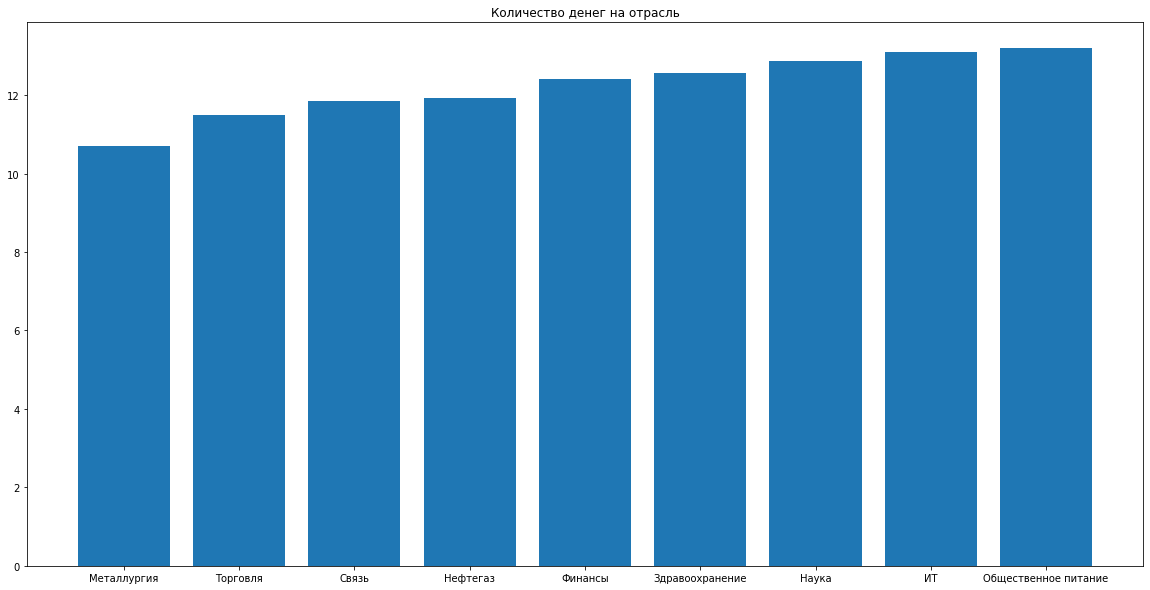

In [174]:
table = table.sort_values(['Annual Income, mln RUR'])
h = plt.figure(figsize=(20,10))
plt.bar(table['Отрасль'], table['Annual Income, mln RUR'])
plt.title('Количество денег на отрасль')

In [118]:
df

,Номер,ФИО,Отрасль,Тест
0,1,Соболева Ирина,ИТ,Моё слово
1,2,Исакова Дария,ИТ,Моё слово
2,3,Иванова Эвелина,Финансы,Моё слово
3,4,Потапов Ян,Наука,Моё слово
4,5,Шашкова Ирма,Металлургия,Моё слово
...,...,...,...,...
138,139,Зайцева Ираида,Здравоохранение,Моё слово
139,140,Молчанов Мартин,Здравоохранение,Моё слово
140,141,Архипов Станислав,Наука,Моё слово
141,142,Струна Марина,Наука,Моё слово


In [119]:
df1 = df.set_index('ФИО')
df1

,Номер,Отрасль,Тест
ФИО,,,
Соболева Ирина,1,ИТ,Моё слово
Исакова Дария,2,ИТ,Моё слово
Иванова Эвелина,3,Финансы,Моё слово
Потапов Ян,4,Наука,Моё слово
Шашкова Ирма,5,Металлургия,Моё слово
...,...,...,...
Зайцева Ираида,139,Здравоохранение,Моё слово
Молчанов Мартин,140,Здравоохранение,Моё слово
Архипов Станислав,141,Наука,Моё слово


In [121]:
incomes1 = incomes.set_index('ФИО')
incomes

,ФИО,"Annual Income, mln RUR"
0,Шашков Вальтер,6
1,Самсонов Прохор,11
2,Некрасова Татьяна,6
3,Копылова Эллина,6
4,Зуев Осип,6
...,...,...
138,Никифоров Ермак,9
139,Савин Натан,19
140,Архипов Станислав,23
141,Струна Марина,20


In [127]:
com = df1.join(incomes1).reset_index()

In [138]:
b = com.sort_values(by=['Отрасль', 'Annual Income, mln RUR'])

In [148]:
an_inc_mean = b.groupby('Отрасль').mean().reset_index()
an_inc_mean = an_inc_mean.sort_values('Annual Income, mln RUR')
an_inc_mean

,Отрасль,Номер,"Annual Income, mln RUR"
2,Металлургия,66.285714,10.714286
7,Торговля,58.833333,11.500000
6,Связь,71.714286,11.857143
4,Нефтегаз,68.384615,11.923077
8,Финансы,78.526316,12.421053
0,Здравоохранение,70.777778,12.555556
3,Наука,86.866667,12.866667
1,ИТ,65.461538,13.102564
5,Общественное питание,82.900000,13.200000


Text(0.5, 1.0, 'Количество денег на отрасль')

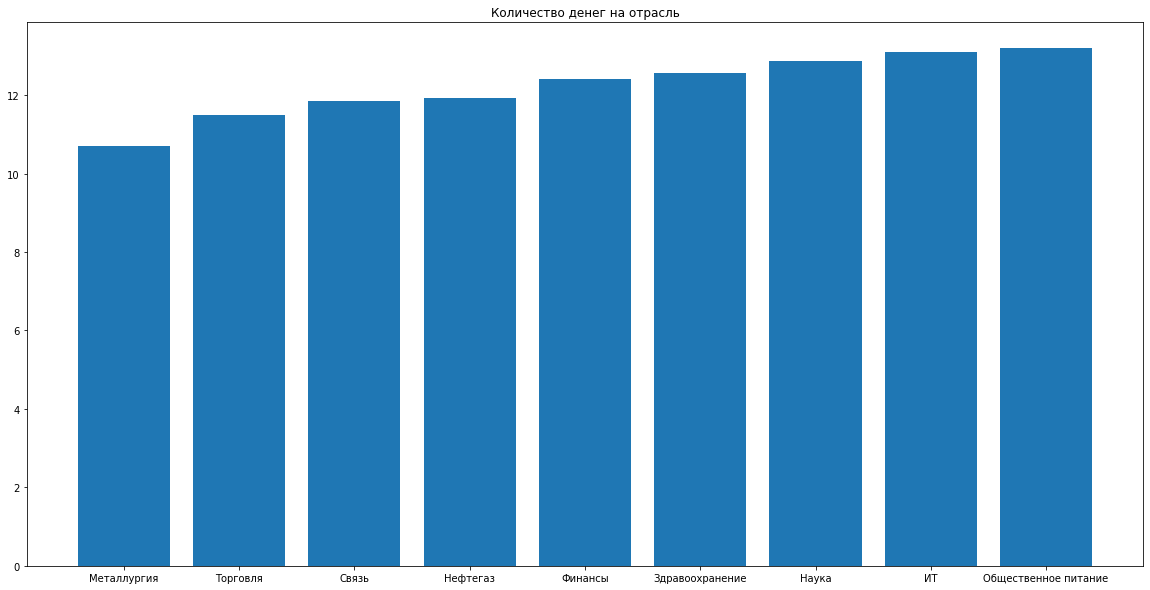

In [150]:
h = plt.figure(figsize=(20,10))
plt.bar(an_inc_mean['Отрасль'], an_inc_mean['Annual Income, mln RUR'])
plt.title('Количество денег на отрасль')

In [151]:
an_inc_mean.describe()

,Номер,"Annual Income, mln RUR"
count,9.000000,9.000000
mean,72.194472,12.237816
std,8.982569,0.814944
min,58.833333,10.714286
25%,66.285714,11.857143
50%,70.777778,12.421053
75%,78.526316,12.866667
max,86.866667,13.200000
